###Projeto Machine Learning II

Usamos o dataset Stroke Prediction Dataset e vamos aplicar o Métodos SVM, AdaBoos e XGBoost

Link para o dataset utilizado: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


In [ ]:
#Importando as bibs importantes
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Carregar o dataset (depois de ter um conhecimento prévio dele)
df =  pd.read_csv('../content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Análise exporatória de dados
# nulos (missing), dados duplicados, distribuição, (tratamento de dados), dados categóricos/numéricos
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.describe(include="object")

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.drop(columns="id")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#arredondando a idade para fazer mais sentido
def tratar_dados(df):
  df = df.drop(columns = 'id')
  df['age'] = df['age'].apply(lambda x : round(x))
  #substituindo os bmi's maiores que 50 e menores que 15 por não haver muitas
  # na prática pessoas com estes valores de IMC
  df['bmi'] = df['bmi'].apply(lambda bmi_value: bmi_value if 15 <
                            bmi_value < 50 else np.nan)
  #preenchendo o índice de massa corporal pela média da idade da entrada
  #para aqueles casos em que temos NaN
  mean_values = df.groupby('age')['bmi'].transform('mean')
  df['bmi'].fillna(mean_values, inplace=True)
  #transformando as colunas object em colunas int64 para ver a correlaçao
  encoded_cols = df.select_dtypes(exclude=['number']).columns.tolist()
  label_encoder = LabelEncoder()
  for col in encoded_cols:
    df[col] = label_encoder.fit_transform(df[col])

  return df


In [ ]:
df = tratar_dados(df)

In [ ]:
#testando se temos ainda alguma valor nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 439.3 KB


In [ ]:
#checando se os dados de stroke estão muito desbalanceados
df["stroke"].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [ ]:
#importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score

In [ ]:
# Separar as classes majoritárias e minoritárias
class_majority = df[df['stroke'] == 0]
class_minority = df[df['stroke'] == 1]

from sklearn.utils import resample

# Fazer downsampling das classes majoritárias
class_majority_downsampled = resample(class_majority, replace=False, n_samples=len(class_minority), random_state=42)

# Combinar as classes majoritárias e minoritárias após o downsampling
data_downsampled = pd.concat([class_majority_downsampled, class_minority])

# Separar novamente as variáveis independentes (X) e a variável dependente (y) após o downsampling
X_downsampled = data_downsampled.drop(columns='stroke')
y_downsampled = data_downsampled['stroke']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)

# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar um modelo de regressão logística com penalidade L2
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo com downsampling:", accuracy)

Acurácia do modelo com downsampling: 0.71


In [ ]:

from imblearn.over_sampling import SMOTE
from collections import Counter

print('Shape do dataset original', Counter(y_train))

# Carregar o dataset (depois de ter um conhecimento prévio dele)
df_smote =  pd.read_csv('../content/healthcare-dataset-stroke-data.csv')

df_smote = tratar_dados(df_smote)

X_smote = df_smote.drop(columns = "stroke")
y_smote = df_smote['stroke']

sm = SMOTE(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

X_res, y_res = sm.fit_resample(X_train, y_train)

print('Shape do dataset após oversampling', Counter(y_res))

Shape do dataset original Counter({1: 200, 0: 198})
Shape do dataset após oversampling Counter({0: 3901, 1: 3901})


In [ ]:
# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar um modelo de regressão logística com penalidade L2
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo com downsampling:", accuracy)

Acurácia do modelo com downsampling: 0.9393346379647749


In [ ]:

from imblearn.over_sampling import ADASYN
from collections import Counter

print('Shape do dataset original', Counter(y_train))

# Carregar o dataset (depois de ter um conhecimento prévio dele)
df_ada =  pd.read_csv('../content/healthcare-dataset-stroke-data.csv')
df_ada = tratar_dados(df_ada)

X_ada = df_ada.drop(columns = "stroke")
y_ada = df_ada['stroke']

ada = ADASYN(random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_ada, y_ada, test_size=0.2, random_state=42)

X_res, y_res = ada.fit_resample(X_train, y_train)

print('Shape do dataset após oversampling', Counter(y_res))


Shape do dataset original Counter({0: 3901, 1: 187})
Shape do dataset após oversampling Counter({0: 3901, 1: 3866})


In [ ]:
# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar e treinar um modelo de regressão logística com penalidade L2
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo com downsampling:", accuracy)

Acurácia do modelo com downsampling: 0.9393346379647749


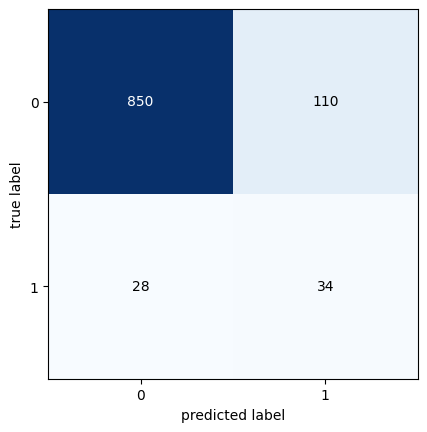

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       878
           1       0.55      0.24      0.33       144

    accuracy                           0.86      1022
   macro avg       0.72      0.60      0.63      1022
weighted avg       0.84      0.86      0.84      1022



In [ ]:
#plotando a matrix de confusão e o classification report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_proba = model.predict_proba(X_test)
threshold = 0.1
predicted_labels = (y_pred_proba[:,1] > threshold).astype(int)
cm = confusion_matrix(y_test, predicted_labels)
plot_confusion_matrix(conf_mat=cm)
plt.show()
print(classification_report(predicted_labels, y_test))

In [ ]:
# Aplicando SMOTEENN para balancear as classes
smote_enn = SMOTEENN(random_state=42)

X = df.drop(columns = "stroke")
y = df['stroke']

X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Padronizando as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando e treinando um modelo de regressão logística com penalidade L2
model = LogisticRegression(penalty='l2', random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.8520097442143727


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 439.3 KB


In [ ]:
data = df.copy()

In [ ]:
data.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,29.983824,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


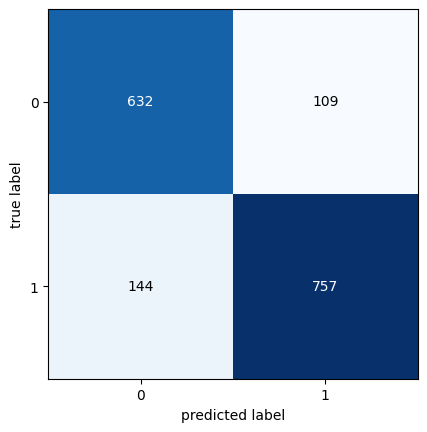

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       776
           1       0.84      0.87      0.86       866

    accuracy                           0.85      1642
   macro avg       0.85      0.84      0.85      1642
weighted avg       0.85      0.85      0.85      1642



In [ ]:
#plotando a matrix de confusão e o classification report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred_proba = model.predict_proba(X_test)
threshold = 0.6
predicted_labels = (y_pred_proba[:,1] > threshold).astype(int)
cm = confusion_matrix(y_test, predicted_labels)
plot_confusion_matrix(conf_mat=cm)
plt.show()
print(classification_report(predicted_labels, y_test))

In [ ]:
#importando algumas bibliotecas úteis
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

In [ ]:
# Carregar o módulo para o SVM
from sklearn.svm import SVC #carregando o módulo de classificação do SVM

In [ ]:
#fazendo o split na base balanceada com o Smoteenn
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
pipe_svc = Pipeline([('svc', SVC(probability=True, random_state=42))]) # Instanciando o modelo SVM pra classificação


In [ ]:
pipe_svc.fit(X_train, y_train) # Treinando o modelo

Pipeline(steps=[('svc', SVC(probability=True, random_state=42))])

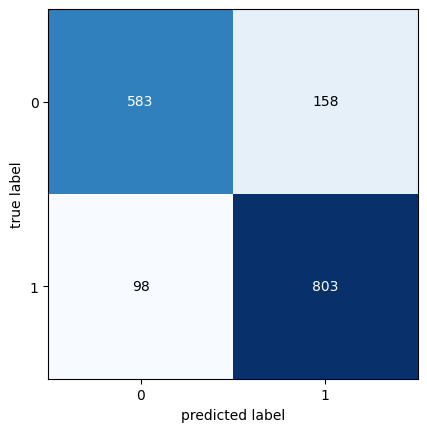

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       741
           1       0.84      0.89      0.86       901

    accuracy                           0.84      1642
   macro avg       0.85      0.84      0.84      1642
weighted avg       0.84      0.84      0.84      1642



In [ ]:
# Faça as previsões diretamente com a função predict
y_pred = pipe_svc.predict(X_test)

# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plote a matriz de confusão
plot_confusion_matrix(conf_mat=cm)
plt.show()

# Exiba o relatório de classificação
print(classification_report(y_test, y_pred))


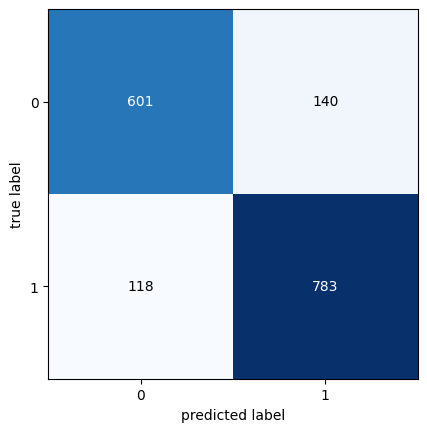

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       719
           1       0.87      0.85      0.86       923

    accuracy                           0.84      1642
   macro avg       0.84      0.84      0.84      1642
weighted avg       0.84      0.84      0.84      1642



In [ ]:
y_pred_proba = pipe_svc.predict_proba(X_test)
threshold = 0.56
predicted_labels = (y_pred_proba[:,1] > threshold).astype(int)
cm = confusion_matrix(y_test, predicted_labels)
plot_confusion_matrix(conf_mat=cm)
plt.show()
print(classification_report(predicted_labels, y_test))

In [ ]:
"""
param_grid_svc = {"svc__kernel" : ['linear', 'rbf', 'poly'],
                  "svc__C" : np.logspace(-2, 2, 5),
                  "svc__gamma": np.logspace(-2, 2, 5)}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_svc = GridSearchCV(estimator=pipe_svc,
                        param_grid=param_grid_svc,
                        scoring='f1_weighted',
                        cv=cv,
                        verbose=10,
                        n_jobs=-1)

grid_svc.fit(X_train, y_train)"""

'\nparam_grid_svc = {"svc__kernel" : [\'linear\', \'rbf\', \'poly\'],\n                  "svc__C" : np.logspace(-2, 2, 5),\n                  "svc__gamma": np.logspace(-2, 2, 5)}\n\ncv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)\n\ngrid_svc = GridSearchCV(estimator=pipe_svc,\n                        param_grid=param_grid_svc,\n                        scoring=\'f1_weighted\',\n                        cv=cv,\n                        verbose=10,\n                        n_jobs=-1)\n\ngrid_svc.fit(X_train, y_train)'

In [ ]:
#Vamos para os modelos de Ensemble
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# métricas de classificação (para avaliação do modelo)
def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):

    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))


    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))


In [ ]:
# modulos referentes ao AdaBoost
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Instanciando e treinando um modelo de AdaBoost
pipe_ab = Pipeline([("AdaBoost", AdaBoostClassifier(random_state=42))])

pipe_ab.fit(X_train, y_train)

Pipeline(steps=[('AdaBoost', AdaBoostClassifier(random_state=42))])


Métricas de avaliação de treino:
[[2482  430]
 [ 306 3350]]


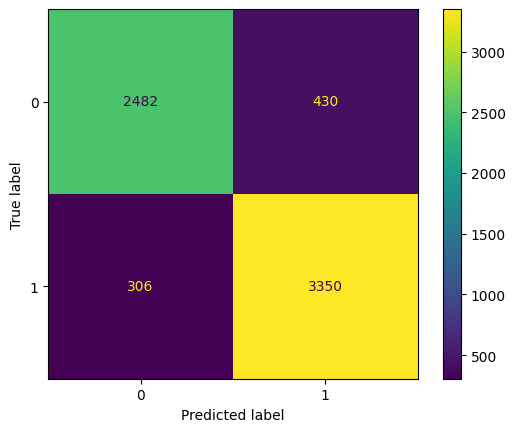

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2912
           1       0.89      0.92      0.90      3656

    accuracy                           0.89      6568
   macro avg       0.89      0.88      0.89      6568
weighted avg       0.89      0.89      0.89      6568


Métricas de avaliação de teste:
[[626 115]
 [ 79 822]]


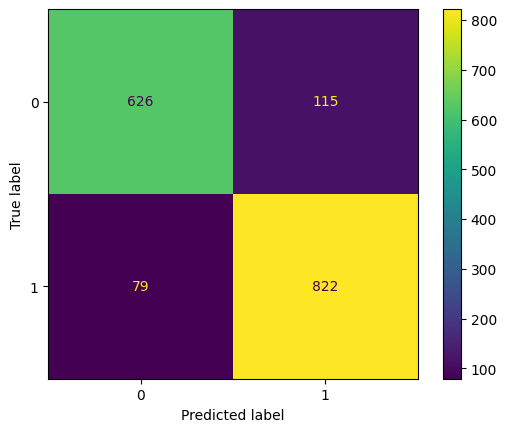

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       741
           1       0.88      0.91      0.89       901

    accuracy                           0.88      1642
   macro avg       0.88      0.88      0.88      1642
weighted avg       0.88      0.88      0.88      1642



In [ ]:
# avaliação do modelo
metricas_classificacao(pipe_ab, X_train, X_test, y_train, y_test)


Métricas de avaliação de treino:
[[2508  404]
 [ 299 3357]]


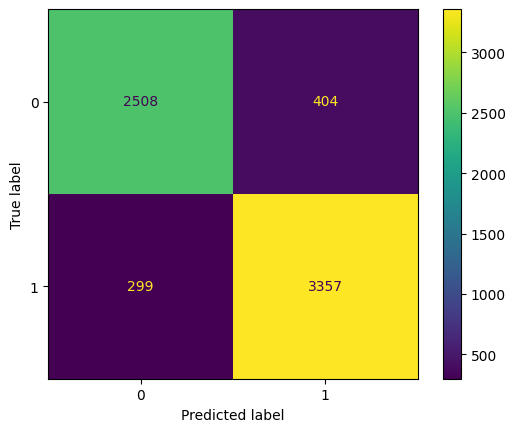

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      2912
           1       0.89      0.92      0.91      3656

    accuracy                           0.89      6568
   macro avg       0.89      0.89      0.89      6568
weighted avg       0.89      0.89      0.89      6568


Métricas de avaliação de teste:
[[631 110]
 [ 75 826]]


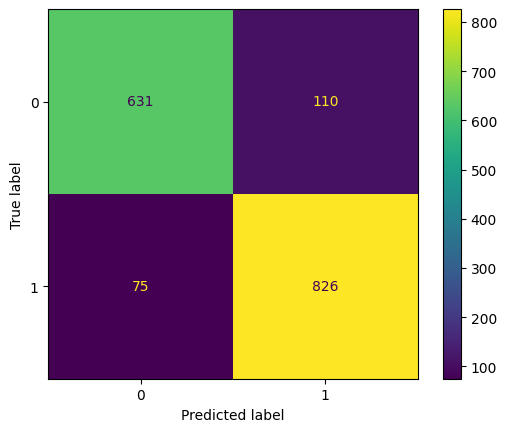

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       741
           1       0.88      0.92      0.90       901

    accuracy                           0.89      1642
   macro avg       0.89      0.88      0.89      1642
weighted avg       0.89      0.89      0.89      1642



In [ ]:
#treinando o modelo AdaBoost com o parâmetro número de estimadores
pipe_ab = Pipeline([("AdaBoost", AdaBoostClassifier(random_state=42, n_estimators=100))])

pipe_ab.fit(X_train, y_train)

metricas_classificacao(pipe_ab, X_train, X_test, y_train, y_test)

In [ ]:
# importar as bibliotecas
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Instaciando e treinando um modelo de GradienteBoosting
pipe_gb = Pipeline([('GradientBoosting', GradientBoostingClassifier(random_state=42))])

pipe_gb.fit(X_train, y_train)

Pipeline(steps=[('GradientBoosting',
                 GradientBoostingClassifier(random_state=42))])

In [ ]:
def metricas_classificacao(estimator):

    # ============================================

    print("\nMétricas de avaliação de treino:")

    y_pred_train = estimator.predict(X_train)

    print(confusion_matrix(y_train, y_pred_train))

    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
    plt.show()

    print(classification_report(y_train, y_pred_train))


    # ============================================

    print("\nMétricas de avaliação de teste:")

    y_pred_test = estimator.predict(X_test)

    print(confusion_matrix(y_test, y_pred_test))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
    plt.show()

    print(classification_report(y_test, y_pred_test))



Métricas de avaliação de treino:
[[2576  336]
 [ 158 3498]]


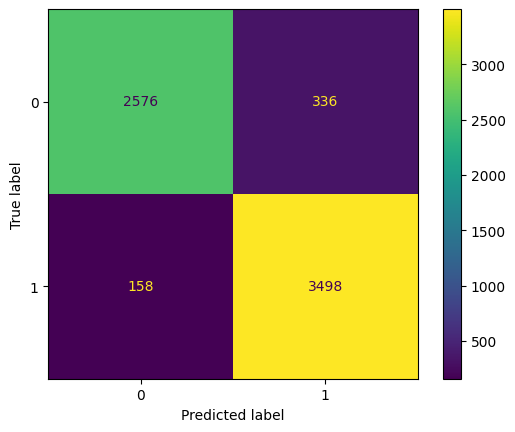

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2912
           1       0.91      0.96      0.93      3656

    accuracy                           0.92      6568
   macro avg       0.93      0.92      0.92      6568
weighted avg       0.93      0.92      0.92      6568


Métricas de avaliação de teste:
[[643  98]
 [ 58 843]]


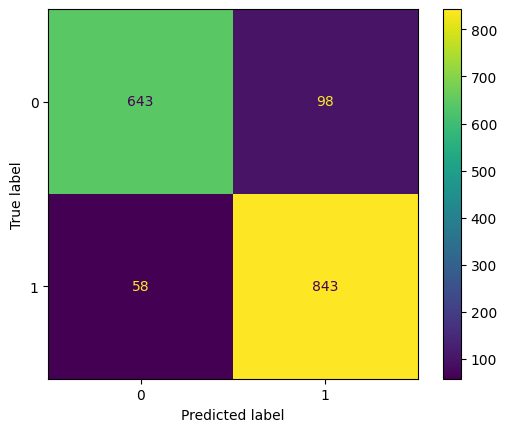

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       741
           1       0.90      0.94      0.92       901

    accuracy                           0.90      1642
   macro avg       0.91      0.90      0.90      1642
weighted avg       0.91      0.90      0.90      1642



In [ ]:
metricas_classificacao(pipe_gb)


Métricas de avaliação de treino:
[[2732  180]
 [  64 3592]]


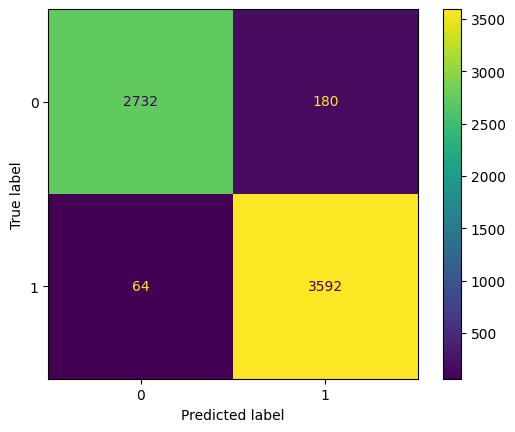

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2912
           1       0.95      0.98      0.97      3656

    accuracy                           0.96      6568
   macro avg       0.96      0.96      0.96      6568
weighted avg       0.96      0.96      0.96      6568


Métricas de avaliação de teste:
[[655  86]
 [ 45 856]]


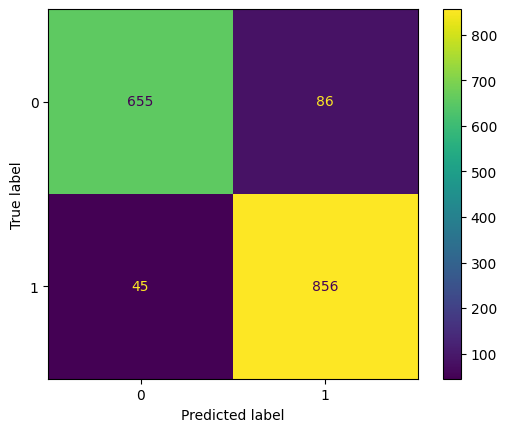

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       741
           1       0.91      0.95      0.93       901

    accuracy                           0.92      1642
   macro avg       0.92      0.92      0.92      1642
weighted avg       0.92      0.92      0.92      1642



In [ ]:
#treinando o modelo com o learning rate
pipe_gb = Pipeline([('GradientBoosting', GradientBoostingClassifier(random_state=42,
                                                                     learning_rate=1))])

pipe_gb.fit(X_train, y_train)

metricas_classificacao(pipe_gb)


Métricas de avaliação de treino:
[[2579  333]
 [ 158 3498]]


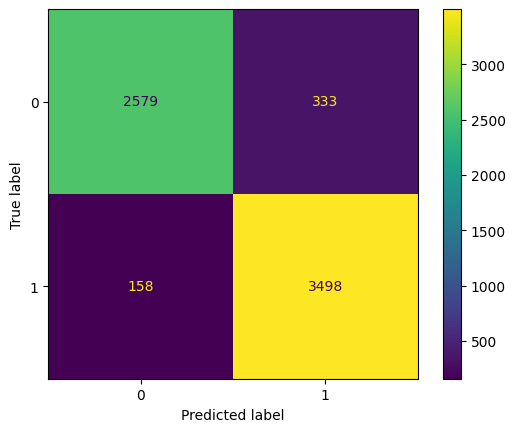

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      2912
           1       0.91      0.96      0.93      3656

    accuracy                           0.93      6568
   macro avg       0.93      0.92      0.92      6568
weighted avg       0.93      0.93      0.92      6568


Métricas de avaliação de teste:
[[643  98]
 [ 56 845]]


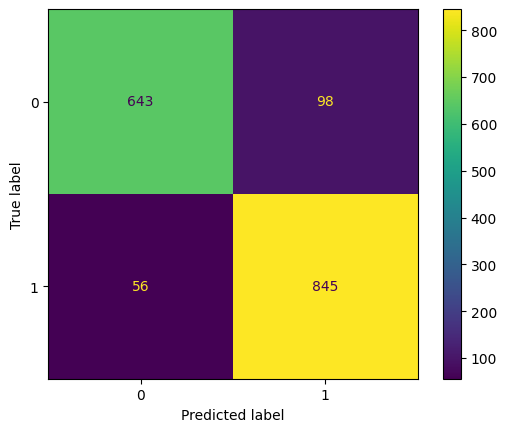

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       741
           1       0.90      0.94      0.92       901

    accuracy                           0.91      1642
   macro avg       0.91      0.90      0.90      1642
weighted avg       0.91      0.91      0.91      1642



In [ ]:
#treinando o modelo com o learning rate e p número de estimadores

pipe_gb = Pipeline([('GradientBoosting', GradientBoostingClassifier(random_state=42,
                                                                     learning_rate=0.01,
                                                                     n_estimators=1000))])

pipe_gb.fit(X_train, y_train)

metricas_classificacao(pipe_gb)

In [ ]:
#Instalando o XgBoost
!pip install xgboost

In [ ]:
# biblioteca específica para o XGBoosting
from xgboost import XGBClassifier

In [ ]:
#Instaciando um modelo de xgboost e treinando o modelo
xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


Métricas de avaliação de treino:
[[2910    2]
 [   0 3656]]


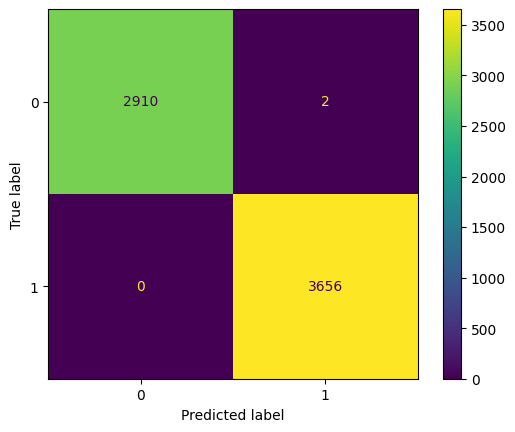

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2912
           1       1.00      1.00      1.00      3656

    accuracy                           1.00      6568
   macro avg       1.00      1.00      1.00      6568
weighted avg       1.00      1.00      1.00      6568


Métricas de avaliação de teste:
[[693  48]
 [ 14 887]]


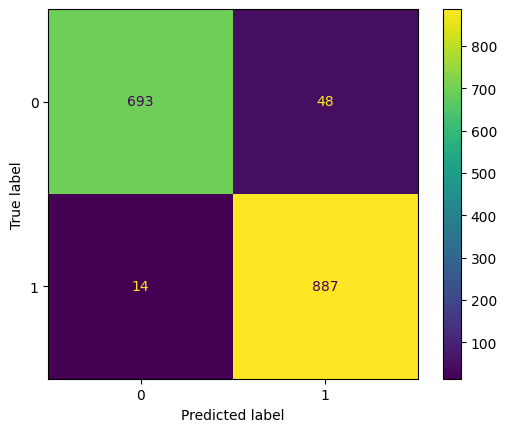

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       741
           1       0.95      0.98      0.97       901

    accuracy                           0.96      1642
   macro avg       0.96      0.96      0.96      1642
weighted avg       0.96      0.96      0.96      1642



In [ ]:
metricas_classificacao(xgb)

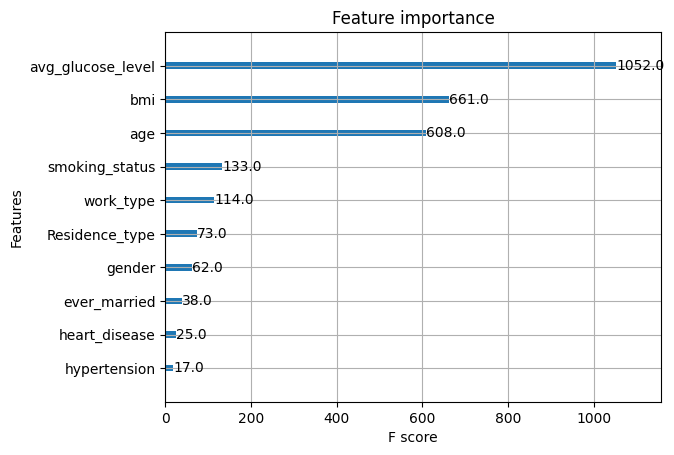

In [ ]:
##Estudando a importancia das features
from xgboost import plot_importance

plot_importance(xgb);

In [ ]:
#Dropando as colunas com menos importancia
data_teste = pd.read_csv('../content/healthcare-dataset-stroke-data.csv')
data_nova = tratar_dados(data_teste)

X = data_nova.drop(columns = 'stroke')
y = data_nova['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


Métricas de avaliação de treino:
[[3889    0]
 [   9  190]]


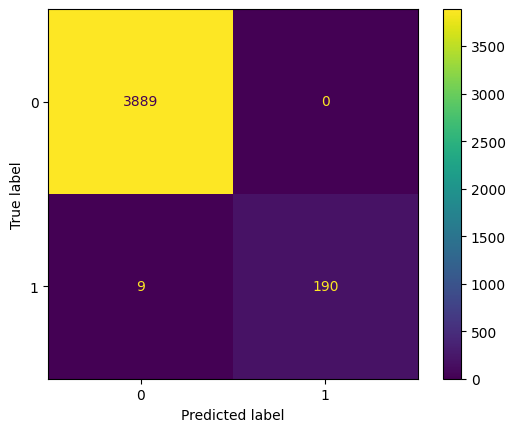

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3889
           1       1.00      0.95      0.98       199

    accuracy                           1.00      4088
   macro avg       1.00      0.98      0.99      4088
weighted avg       1.00      1.00      1.00      4088


Métricas de avaliação de teste:
[[954  18]
 [ 49   1]]


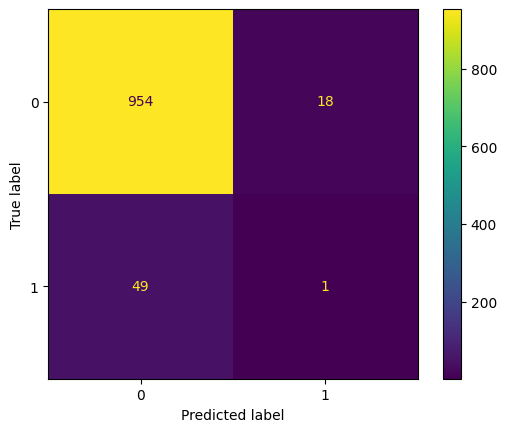

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       972
           1       0.05      0.02      0.03        50

    accuracy                           0.93      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.91      0.93      0.92      1022



In [ ]:
metricas_classificacao(xgb)